In [1]:

import SimpleITK as sitk
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [3]:
data_path=r'F:\Download\1'
fileNum='04595852'
fileName=os.path.join(data_path,fileNum+'.nrrd')
fileNameMask=os.path.join(data_path,fileNum+'_mask.nrrd')
extraction_file=f'F:\Download\extraction'

In [58]:
'''
读取origin文件和mask文件
'''
r=8
img = sitk.ReadImage(fileName)
mask= sitk.ReadImage(fileNameMask)


In [56]:
'''
Test
'''
mask_arr=sitk.GetArrayFromImage(mask)

def getnonzeros(data:np.ndarray):
    nonIndex=[[],[],[]]
    for i in range(0,3):
        for j in range(0,data.shape[i]):
            if i==0:
                temp=np.sum(data[j,:,:]).squeeze()
            elif i==1:
                temp=np.sum(data[:,j,:]).squeeze()
            elif i==2:
                temp=np.sum(data[:,:,j]).squeeze()
            if temp !=0:
                nonIndex[i].append(j)
    for list in nonIndex:
        print(list)
    return nonIndex
getnonzeros(mask_arr)

[174, 175, 176, 177, 178]
[298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310]
[154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165]


[[174, 175, 176, 177, 178],
 [298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310],
 [154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165]]

In [59]:
# Get the centroid per label
print('Multiple labels and their centroids:')
label_shape_filter.Execute(mask)
for label in range(1, label_shape_filter.GetNumberOfLabels()+1):
    centor=img.TransformPhysicalPointToIndex(label_shape_filter.GetCentroid(label))
    for i,c in enumerate(centor):
        if i ==0:
            tmp=img[c-r:c+r,:,:]
        elif i==1:
            tmp=img[:,c-r:c+r,:]
        elif i==2:
            tmp=img[:,:,c-r:c+r]
        sitk.WriteImage(tmp,os.path.join(extraction_file,f"img_{i}.nii.gz"))
    w,h,n=centor
    print(centor)
    tmp=img[w-r:w+r,h-r:h+r,n-r:n+r]
    sitk.WriteImage(tmp,os.path.join(extraction_file,f"img_3.nii.gz"))



Multiple labels and their centroids:
(160, 304, 176)


In [17]:
print(img.GetSize())
print(label_shape_filter.GetNumberOfLabels())

(512, 512, 257)
1


In [13]:
import matplotlib
from matplotlib import pylab as plt
import nibabel as nib
from nibabel.viewers import OrthoSlicer3D
#file = fileName #你的nii或者nii.gz文件路径
#img = nib.load(file)

print(img)
print(img.header['db_name']) #输出nii的头文件
width, height, queue = img.dataobj.shape
OrthoSlicer3D(img.dataobj).show()

num = 1
for i in range(0, queue, 10):
 img_arr = img.dataobj[:,:,i]
 plt.subplot(5,4,num)
 plt.imshow(img_arr, cmap='gray')
 num += 1

plt.show()

<class 'nibabel.nifti1.Nifti1Image'>
data shape (512, 257)
affine: 
[[ -0.71289098   0.           0.         182.5       ]
 [  0.          -1.25         0.         256.5       ]
 [  0.           0.           1.           0.        ]
 [  0.           0.           0.           1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  2 512 257   1   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [1.       0.712891 1.25     1.       0.       0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0

ValueError: not enough values to unpack (expected 3, got 2)

C:\Users\Iroin\AppData\Local\Temp\ipykernel_12116\3488616981.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img_arr = nib.load(os.path.join(extraction_file,f"img_{i}.nii.gz")).get_data()


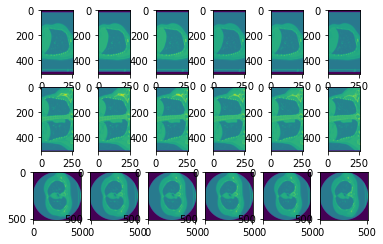

In [19]:
%matplotlib inline


plt.figure()
for i in range(0,3):
    img_arr = nib.load(os.path.join(extraction_file,f"img_{i}.nii.gz")).get_data()
    for j in range(1,r*2+1):
        if r==0:
            r=0.5
        plt.subplot(3,r*2,i*r*2+j)
        if i==0:
            plt.imshow(img_arr[j-1,:,:])
        elif i==1:
            plt.imshow(img_arr[:,j-1,:])
        elif i==2:
            plt.imshow(img_arr[:,:,j-1])
plt.show()


In [3]:
def showImg(file_name,axis=2):
    img = nib.load(file_name)
    img_arr = img.get_data()
    plt.figure()
    for i in range(0,img.shape[axis]):
        c=int(img.shape[axis]/5)
        if img.shape[axis]%5:
            c+=1
        plt.subplot(c,5,i+1)
        if axis==2:
            plt.imshow(img_arr[:,:,i],cmap='gray')
        elif axis==1:
            plt.imshow(img_arr[:,i,:],cmap='gray')
        elif axis==0:
            plt.imshow(img_arr[i,:,:],cmap='gray')
    plt.show()

In [4]:
%matplotlib inline
showImg(os.path.join(extraction_file,f"img_3.nii.gz"),2)


NameError: name 'showImg' is not defined

In [5]:

img = nib.load(os.path.join(extraction_file,f"img_3.nii.gz"))
img_arr = img.get_data()
print(img_arr[:,:,0])

[[-604 -316 -248 -492 -781 -891 -924 -908 -872 -888 -878 -860 -890 -912
  -894 -893]
 [-272 -161 -356 -710 -873 -899 -889 -876 -877 -876 -857 -853 -847 -871
  -885 -881]
 [-191 -226 -599 -883 -920 -895 -875 -879 -885 -869 -860 -866 -790 -756
  -835 -872]
 [-148 -439 -824 -931 -925 -902 -902 -913 -895 -892 -906 -907 -791 -605
  -695 -851]
 [-299 -701 -907 -905 -909 -913 -924 -923 -892 -891 -918 -921 -846 -636
  -630 -771]
 [-522 -922 -945 -909 -915 -912 -909 -916 -901 -882 -898 -900 -870 -786
  -697 -630]
 [-628 -932 -923 -901 -911 -886 -876 -899 -897 -895 -905 -906 -889 -862
  -802 -711]
 [-665 -873 -885 -884 -881 -852 -833 -845 -846 -870 -886 -892 -912 -894
  -866 -868]
 [-773 -885 -890 -900 -895 -868 -847 -821 -817 -833 -844 -868 -908 -915
  -885 -878]
 [-866 -922 -916 -900 -907 -902 -907 -891 -855 -827 -851 -875 -901 -917
  -893 -870]
 [-866 -890 -900 -875 -886 -889 -888 -902 -876 -849 -871 -878 -895 -915
  -900 -868]
 [-871 -865 -875 -859 -864 -886 -871 -886 -890 -873 -887 -895 -89

C:\Users\Iroin\AppData\Local\Temp\ipykernel_12544\1027295742.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img_arr = img.get_data()


In [70]:
print(img.shape)
print(img_arr.shape)

(16, 16, 16)
(16, 16, 16)


In [ ]:
'''
    以下为批量处理
'''

In [ ]:
data_path=r'F:\Download\1'
image_path=os.path.join(data_path,'image')
csv_path=os.path.join(data_path,'results.xlsx')

data=pd.read_excel(csv_path,usecols=[1,2])
print(data)

In [ ]:
for i in range(len(data)):
    filename=str(data.iloc[i,0])[:-5]
    filepath=os.path.join(data_path,filename+'.nrrd')
    mask_file_path=os.path.join(data_path,filename+'_mask.nrrd')
    type=(str(data.iloc[i,1]).strip())=='有'
    if type:
        type=1
    else:
        type=0
    image_file=os.path.join(image_path,filename)
    nrrd_data,_=nrrd.read(filepath)
    mask_data,_=nrrd.read(mask_file_path)
    nonIndex=getnonzeros(mask_data)
    nrrd_data=zscore(nrrd_data)*255
    nrrd_data=nrrd_data.astype(int)
    ROI_data=nrrd_data[nonIndex[0][0]:nonIndex[0][-1]+1,nonIndex[1][0]:nonIndex[1][-1]+1,nonIndex[2][0]:nonIndex[2][-1]+1]
    for i in range(0,3):
        target_file=os.path.join(image_path,filename,f'{i}')
        if not os.path.exists(target_file):
            os.makedirs(target_file)
        for j in range(ROI_data.shape[i]):
            if i==0:
               img=Image.fromarray(ROI_data[j,:,:])
            elif i==1:
                img=Image.fromarray(ROI_data[:,j,:])
            elif i==2:
                img=Image.fromarray(ROI_data[:,:,j])
            img.convert('L').save(os.path.join(target_file,f'{j}_{type}.png'))
    print(filename,':complete!')

In [ ]:
for i in range(len(data)):
    filename=str(data.iloc[i,0])[:-5]
    filepath=os.path.join(data_path,filename+'.nrrd')
    mask_file_path=os.path.join(data_path,filename+'_mask.nrrd')
    type=(str(data.iloc[i,1]).strip())=='有'
    if type:
        type=1
    else:
        type=0
    nrrd_img=sitk.ReadImage(filepath)
    nrrd_arr=sitk.GetArrayFromImage(nrrd_img)
    mask_img=sitk.ReadImage(mask_file_path)
    mask_arr=sitk.GetArrayFromImage(mask_img)
    onIndex=getnonzeros(mask_data)
    mask=sitk.ConnectedComponent(mask)
    label_shape_filter = sitk.LabelShapeStatisticsImageFilter()

